## Initialising R  
In this lesson we will be exploring the cars database that will be used in your A-level.
We will be using a powerful programming language called *R*.
To run code in *R*:  
1. Click on the box containing code to highlight it in green.
2. Click on the play button above to show the output.

#### **Exercise 1**  
Load the data and settings by running the code below. If you do this successfully you should get a message in the output.

In [22]:
library(tidyverse)
library(readr)

options(repr.plot.width=8,
        repr.plot.height=4,
        warn=-1)

car_data <- read_csv("cars_data.csv")

clean_theme <- theme_bw(base_size=12, base_family="sans") + 
  theme(panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.text = element_text(size = 12),
        legend.title = element_text(size=12),
        axis.line = element_line(size = 0.5, colour = "black"),
        axis.title = element_text(face = "plain"),
        strip.background = element_blank()
  )

clean_theme_hist <- theme_bw(base_size=12, base_family="sans") + 
  theme(panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.text = element_text(size = 12),
        legend.title = element_text(size=12),
        axis.line = element_line(size = 0.5, colour = "black"),
        axis.title = element_text(face = "plain"),
        strip.background = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
  )

car_data <-
    car_data %>%
    mutate(YearRegistered = as.factor(YearRegistered),
         GovRegion = as.factor(GovRegion),
         PropulsionTypeId = as.factor(ifelse(PropulsionTypeId == 1, "Petrol",
                                   ifelse(PropulsionTypeId == 2, "Diesel",
                                          ifelse(PropulsionTypeId == 3, "Electric",
                                                 ifelse(PropulsionTypeId == 7, "Gas/Petrol",
                                                        ifelse(PropulsionTypeId == 8, "Electric/Petrol", NA)))))),
         BodyTypeId = as.factor(ifelse(BodyTypeId == 1, "2 door saloon",
                             ifelse(BodyTypeId == 2, "4 door saloon",
                                    ifelse(BodyTypeId == 3, "saloon",
                                           ifelse(BodyTypeId == 4, "convertible",
                                                  ifelse(BodyTypeId == 5, "coupe",
                                                         ifelse(BodyTypeId == 6, "estate",
                                                                ifelse(BodyTypeId == 13, "3 door hatchback",
                                                                       ifelse(BodyTypeId == 14, "5 door hatchback",
                                                                              ifelse(BodyTypeId == 96, "Multi Purpose Vehicle", NA)))))))))),
         KeeperTitleId = as.factor(ifelse(KeeperTitleId == 1, "Male",
                                ifelse(KeeperTitleId == 2, "Female",
                                       ifelse(KeeperTitleId == 3, "(not used)",
                                              ifelse(KeeperTitleId == 4, "unknown (Dr, Rev, etc.)",
                                                     ifelse(KeeperTitleId == 5, "company", NA)))))))

print("Ready to rumble")

[1] "Ready to rumble"


## Inspecting the data

Each row is a single entry (car) and each column contains a particular variable.
For the **car_data** dataset the variables are as follows:  

* *Reference number*: a unique identifier
* *Make*:             the car manufacturer
* *PropulsionTypeId*: a code for the type of fuel (e.g. petrol, diesel...)
* *BodyTypeId*:       a code for the type of body (e.g. convertable, estate, coupe... )
* *GovRegion*:        where the registered keeper lives
* *EngineSize*:       capacity of engine (cubic cm)
* *YearRegistered*:   the year in which the vehicle was first registered
* *Mass*:             the mass of the vehicle in Kg + 75 (the average person)
* *CO2*:              carbon dioxide emissions (g/km)
* *CO*:               carbon monoxide emissions (g/km)
* *NOX*:              oxides of nitrogen emissions (g/km)
* *part*: particulate emissions (g.km) DIESEL ONLY
* *hc*: hydrocarbon emissions (g/km)
* Random number: a random number betwen 0 and 1 to assist with sampling  

The **head()** function returns the first six rows (cars) of the dataset we feed to it.
To feed a dataset to a function we use the **%>%** symbol. For example:

```
dataset %>%
head()
```

#### **Exercise 2**  
Display the first 6 cars in the *car_data* database

In [23]:
car_data %>%
head()

ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
440,VAUXHALL,1,96,London,1,1598,2002,1970,190,0.219,0.026,NA,0.037,0.2794350
1465,VAUXHALL,1,14,South West,5,1398,2016,1163,118,0.463,0.010,NA,0.031,0.2144179
3434,VOLKSWAGEN,1,14,South West,2,1395,2016,1316,113,0.242,0.033,NA,0.048,0.9800254
1801,VAUXHALL,1,14,South West,4,1598,2016,1355,159,0.809,0.012,NA,0.051,0.2865567
2330,BMW,2,13,South West,5,1995,2016,1445,114,0.180,0.023,NA,NA,0.2646628
2216,FORD,2,6,South West,5,1499,2016,1425,98,0.354,0.074,NA,NA,0.6902468


#### **Questions**  
1) Which variables are continuous and which are categorical?  
2) Which car has the biggest engine? 
3) What is the oldest car?

## Means, Medians, and Ranges  
We can summarise each variable using the **summary()** function to display descriptive statistics:  
```
... %>%
summary()
```

For continuous variables, this will display:
* Min. : the minimum value in the database
* 1st Qu. : the value of the lower quartile in the database
* Median : the median value in the database
* Mean : the mean value in the database
* 3rd Qu. : the value of the upper quartile in the database
* Max. : the maximum value in the database  
#### **Exercise 3**  
Display summary statistics for the variables in the *car_data* database  
#### **Questions**
1) What is the highest amount of CO2 emitted?
2) What is the interquartile range for mass?
3) Which variable has the largest proportional difference between its median and mean values?
4) What does 3. tell us about its distribution?

In [24]:
car_data %>%
summary()

 ReferenceNumber      Make           PropulsionTypeId   BodyTypeId   
 Min.   :   1.0   Length:3827        Min.   :1.000    Min.   : 1.00  
 1st Qu.: 957.5   Class :character   1st Qu.:1.000    1st Qu.:13.00  
 Median :1914.0   Mode  :character   Median :1.000    Median :14.00  
 Mean   :1914.0                      Mean   :1.583    Mean   :19.19  
 3rd Qu.:2870.5                      3rd Qu.:2.000    3rd Qu.:14.00  
 Max.   :3827.0                      Max.   :8.000    Max.   :96.00  
                                                                     
  GovRegion         KeeperTitleId     EngineSize   YearRegistered
 Length:3827        Min.   :1.000   Min.   :   0   2002:1299     
 Class :character   1st Qu.:1.000   1st Qu.:1395   2016:2528     
 Mode  :character   Median :2.000   Median :1596                 
                    Mean   :2.733   Mean   :1646                 
                    3rd Qu.:5.000   3rd Qu.:1968                 
                    Max.   :5.000   Max.   :

## Visualisation 1 - Histograms

Histograms allow us to visualise the distribution of a variable.
The **x(horizontal)-axis** shows us the range of values of the variable in our dataset.
The **y(vertical)-axis** shows us the total number of rows (cars) that correspond to that range of values.  

In *R*, we can do this using the ggplot() function:
1) Feed the **dataset** to our function.
2) Specify the **variable** (e.g. CO2, EngineSize, etc.) we want to visualise on our x-axis.
3) Add(**+**) the type of graph we want on the line below. There are many different types of graph, but the histogram is called **geom_histogram()**.
4) Set options to change the appearance of our graph and make it pretty.
```
dataset %>%
ggplot(aes(x = variable)) +
    geom_histogram(options)+
    more_options
```
#### **Exercise 4**  
Visualise the distribution of CO2 emissions in the car database



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


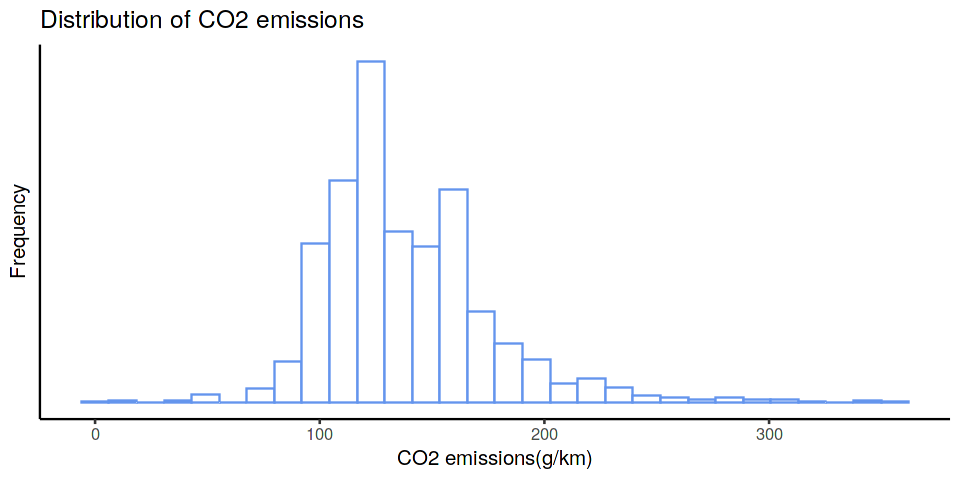

In [25]:
car_data %>%
ggplot(aes(x = CO2))+
    geom_histogram(colour="cornflowerblue",
                   fill="white") +
    labs(title = "Distribution of CO2 emissions",
         x = "CO2 emissions(g/km)",
         y = "Frequency")+
    clean_theme_hist


#### **Exercise 5**  
Visualise the distributions for CO emissions and NOx emissions  
(*hint: copy and paste your previous code to make this quicker*)

#### **Questions**
Considering the CO2, CO, and NOx distributions, when is the median a more suitable measure than the mean?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


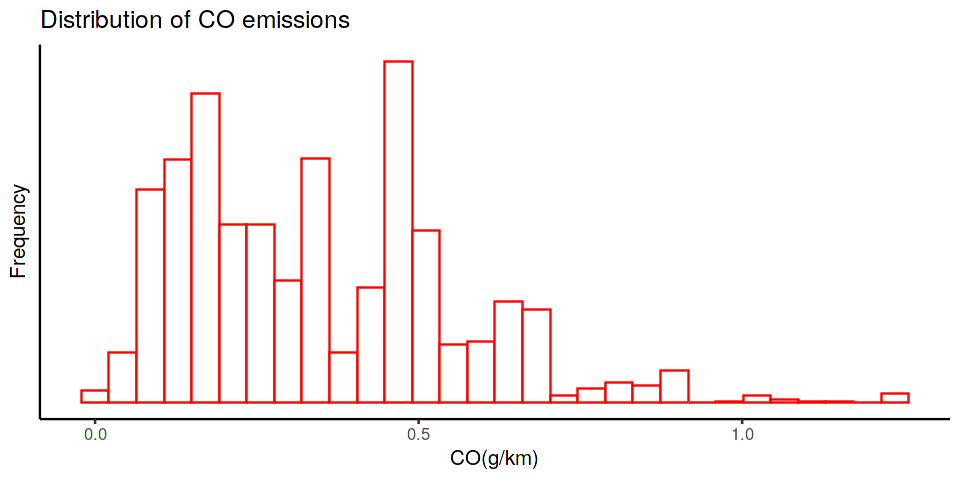

In [26]:
car_data %>%
ggplot(aes(x = CO))+
    geom_histogram(colour="red",
                   fill="white") +
    labs(title = "Distribution of CO emissions",
         x = "CO(g/km)",
         y = "Frequency")+
    clean_theme_hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


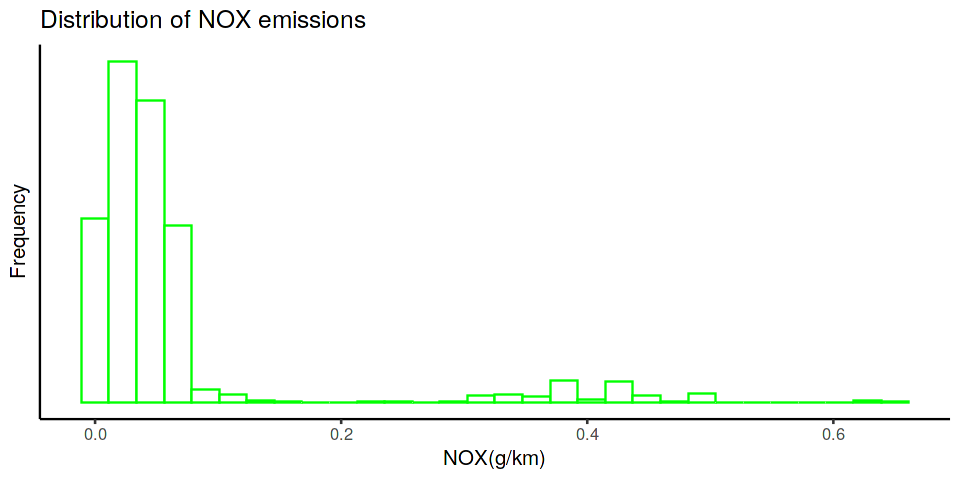

In [27]:
car_data %>%
ggplot(aes(x = NOX))+
    geom_histogram(colour="green",
                   fill="white") +
    labs(title = "Distribution of NOX emissions",
         x = "NOX(g/km)",
         y = "Frequency")+
    clean_theme_hist

## Visualisation 2 - Histograms with ranges
We can also include information about the mean/median and range on our histograms by drawing a verticle line through these points:
1) Add (**+**) the **geom_vline()** function below **geom_histogram()**
2) Specify **xintercept =** as the value you wish to display

```
dataset %>%
ggplot(aes(x = variable)) +
    geom_histogram(options)+
    geom_vline(xintercept = 12345)+
    more_options
```

3) Multiple lines can be drawn (e.g. one for the lower quartile, one for the mean/median, and one for the upper quartile)
4) You can change the **linetype = "dashed"** to make it easier to see what each line corresponds to - **DON'T FORGET THE ""**

```
ggplot(aes(x = variable)) +
    geom_histogram(options)+
    geom_vline(xintercept = mean)+
    geom_vline(xintercept = lowerQ,
               linetype = "dashed")+
    geom_vline(xintercept = upperQ,
               linetype = "dashed")+
    more_options
```

#### **Exercise 6**
Visualise the distribution for CO2 emissions, including lines for the mean and interquartile range.  
(*hint: first you'll need to calculate the values using **summary()***)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


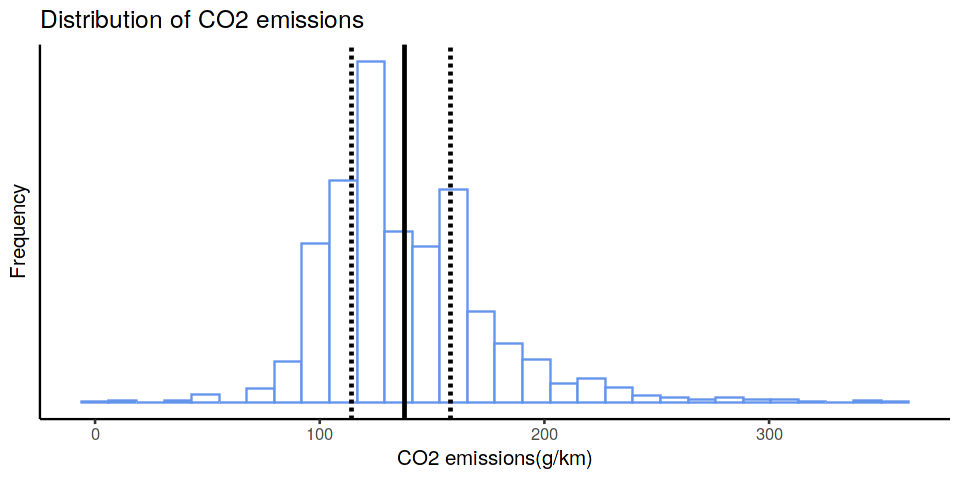

In [28]:
car_data %>%
  ggplot(aes(x=CO2))+
  geom_histogram(color = "cornflowerblue",
                 fill="white")+
  geom_vline(xintercept = 137.6,
             size = 1)+
  geom_vline(xintercept = 114,
             linetype = "dashed",
             size = 1)+
  geom_vline(xintercept = 158,
             linetype = "dashed",
             size = 1)+
  labs(title = "Distribution of CO2 emissions",
       y = "Frequency",
       x = "CO2 emissions(g/km)")+
  clean_theme_hist

#### **Exercise 7**
Visualise the distribution for CO and NOx emissions, you should decide which lines are the most appropriate.  
(*hint: first you'll need to calculate the values using **summary()***)

#### **Questions**
1) Which variable shows the narrowest distribution? widest?
2) Are any of the variables skewed?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


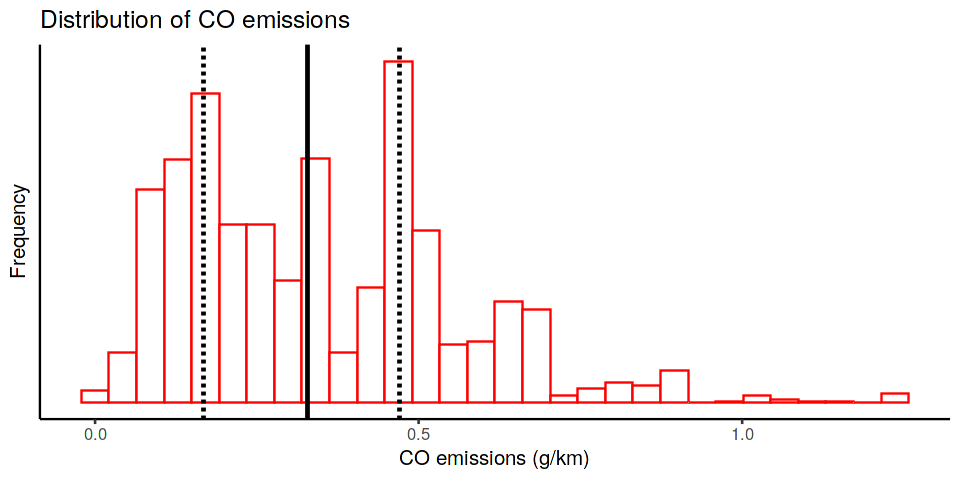

In [29]:
car_data %>%
  ggplot(aes(x=CO))+
  geom_histogram(color = "red",
                 fill="white")+
  geom_vline(xintercept = 0.328,
             size = 1)+
  geom_vline(xintercept = 0.167,
             linetype = "dashed",
             size = 1)+
  geom_vline(xintercept = 0.47,
             linetype = "dashed",
             size = 1)+
  labs(title = "Distribution of CO emissions",
       y = "Frequency",
       x = "CO emissions (g/km)")+
  clean_theme_hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


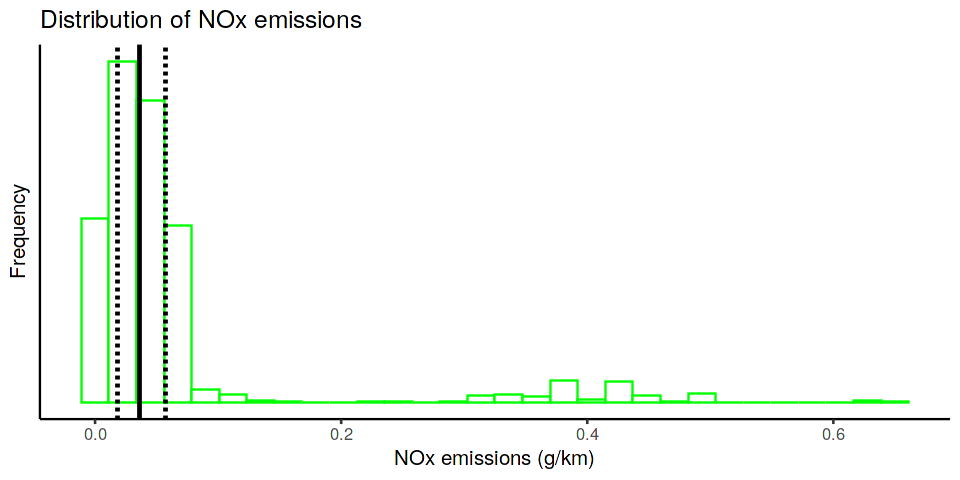

In [30]:
car_data %>%
  ggplot(aes(x=NOX))+
  geom_histogram(color = "green",
                 fill="white")+
  geom_vline(xintercept = 0.036,
             size = 1)+
  geom_vline(xintercept = 0.018,
             linetype = "dashed",
             size = 1)+
  geom_vline(xintercept = 0.057,
             linetype = "dashed",
             size = 1)+
  labs(title = "Distribution of NOx emissions",
       y = "Frequency",
       x = "NOx emissions (g/km)")+
  clean_theme_hist

## Visualisation 3 - Boxplots  
Histograms aren't very useful if we want to compare distributions.
For this we need box plots:
1) Feed the data to the **ggplot()** function
2) Specify the **variable** as the **y** axis
3) Add(**+**) **geom_boxplot()** below
4) Specify further options

```
data_set %>%
    ggplot(aes(y = variable))+
    geom_boxplot(options)+
    more_options
```
## **Exercise 8**  
Plot a boxplot for CO2 emissions from the car data

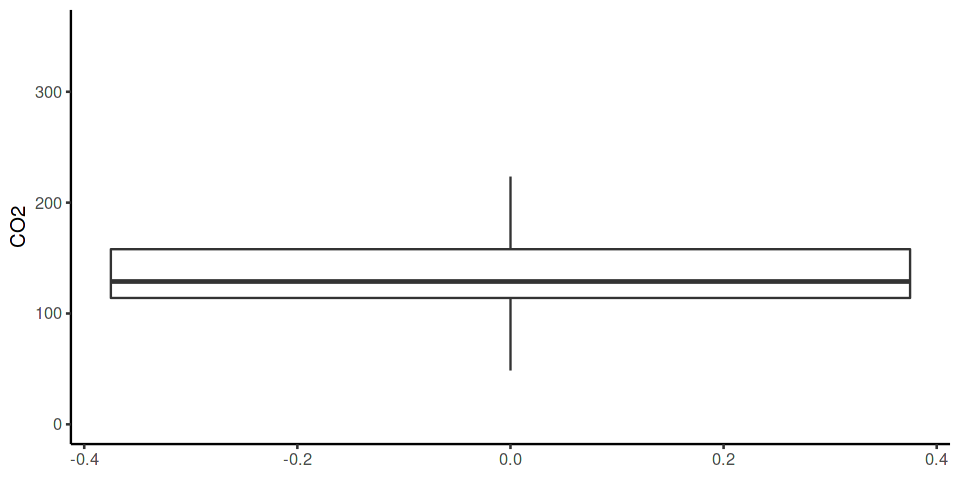

In [31]:
car_data %>%
  ggplot(aes(y=CO2))+
  geom_boxplot(outlier.shape = NA)+
  clean_theme

## Comparing distributions  
We might want to compare CO2 emissions between 2002 and 2016.
For this we must group continuous variables by their category (e.g. Year Registered) and see how the distributions differ:
1) In addition to *y* axis, specify the *x* axis as the categorical variable whose groups we wish to compare
2) We can also set the colour to the categorical variable to make it easier to see.

```
car_data %>%
  ggplot(aes(y= continuous variable, x = categorical variable, colour = categorical variable))+
  geom_boxplot(options)+
  more_options
```

## **Exercise 9**  
Visualise a comparison between CO2 emissions in 2002 and 2016

## **Questions**  
1) What has the general trend been in terms of a) central tendency and b) spread?
2) Why do you think this is the case?

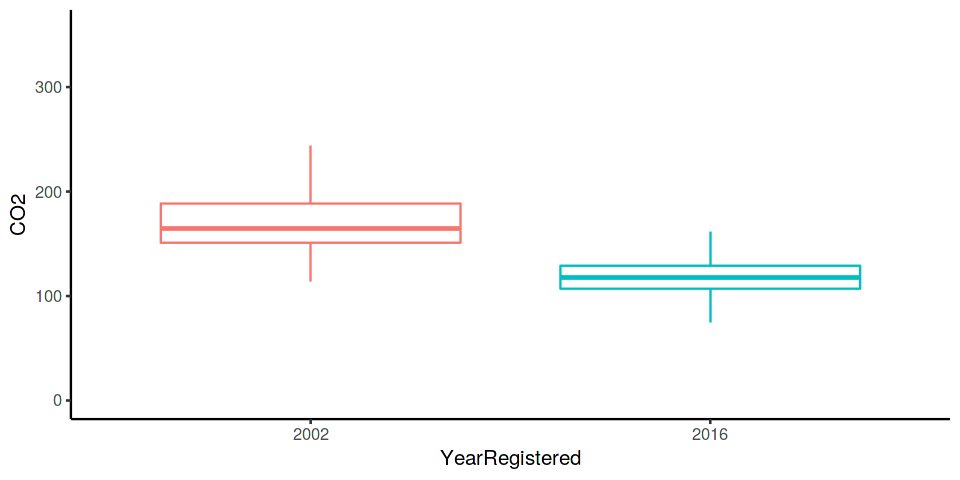

In [32]:
car_data %>%
  ggplot(aes(x = YearRegistered, y = CO2, color = YearRegistered))+
  geom_boxplot(outlier.shape = NA)+
  clean_theme+
  theme(legend.position = "none")

## **Optional Exercise**
How do emissions differ between different Makes and BodyTypes of vehicle? Play around and see if you can find any interesting patterns